In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import re  # Import the regular expressions library


def prepare_data_for_evaluation(x_e, y_e, s_e, h_e, x_v, y_v, s_v, h_v):
    x_data = np.concatenate([x_e, x_v], axis=0)
    y_data = np.concatenate([y_e, y_v], axis=0)
    s_data = np.concatenate([s_e, s_v], axis=0)  # Session numbers
    h_data = np.concatenate([h_e, h_v], axis=0)  # Day intervals
    return x_data, y_data, s_data, h_data

x_data, y_data, s_data, h_data = prepare_data_for_evaluation(
        np.load('x_test_e.npy'), np.load('y_test_e.npy'), np.load('s_test_e.npy'), np.load('h_test_e.npy'),
        np.load('x_test_v.npy'), np.load('y_test_v.npy'), np.load('s_test_v.npy'), np.load('h_test_v.npy')
    )


In [4]:


# Combine data into a pandas DataFrame
df = pd.DataFrame({
    'subject_id': y_data,
    'hardware': h_data,
    'session': s_data
})

# Ensure session represents the number of days after the first session for each subject_id and hardware combination
df['session'] = df.groupby(['subject_id', 'hardware'])['session'].transform(lambda x: x - x.min())

# Count unique triplets
unique_sessions = df.drop_duplicates(subset=['subject_id', 'hardware', 'session']).shape[0]

print(f"Number of unique sessions: {unique_sessions}")

Number of unique sessions: 1699


In [5]:
# Combine data into a pandas DataFrame
df = pd.DataFrame({
    'subject_id': y_data,
    'hardware': h_data,
    'session': s_data
})


print("\nUnique Sessions for Each Subject:")
subject_sessions = df.groupby(['subject_id', 'hardware'])['session'].unique()
for subject_id, sessions in subject_sessions.items():
    print(f"Subject ID: {subject_id}, Unique Sessions: {sorted(sessions)}")


Unique Sessions for Each Subject:
Subject ID: (70, b'Geodisi'), Unique Sessions: [1, 8, 36, 43, 47, 50, 64]
Subject ID: (70, b'HydroCe'), Unique Sessions: [2, 9, 12, 29, 30, 33, 37, 44, 51, 54, 57, 65]
Subject ID: (82, b'HydroCe'), Unique Sessions: [1, 12, 14, 15, 19, 21, 33, 35, 36, 40, 42, 43, 46, 47, 49, 54, 55, 56, 57]
Subject ID: (85, b'Geodisi'), Unique Sessions: [51]
Subject ID: (85, b'HydroCe'), Unique Sessions: [1, 3, 6, 7, 9, 14, 16, 17, 21, 22, 23, 28, 29, 30, 34, 35, 38, 49]
Subject ID: (86, b'Geodisi'), Unique Sessions: [57, 64, 74, 92, 95]
Subject ID: (86, b'HydroCe'), Unique Sessions: [1, 3, 8, 10, 17, 18, 28, 36, 39, 46, 50, 67, 77, 252]
Subject ID: (96, b'Geodisi'), Unique Sessions: [4, 14, 21, 25, 29, 36, 39, 69, 159]
Subject ID: (96, b'HydroCe'), Unique Sessions: [1, 11, 20, 22, 34, 41, 48, 55, 70]
Subject ID: (103, b'Geodisi'), Unique Sessions: [1, 196, 203, 205, 227, 231, 233, 245, 247, 248]
Subject ID: (103, b'HydroCe'), Unique Sessions: [210, 212, 217, 219, 220,

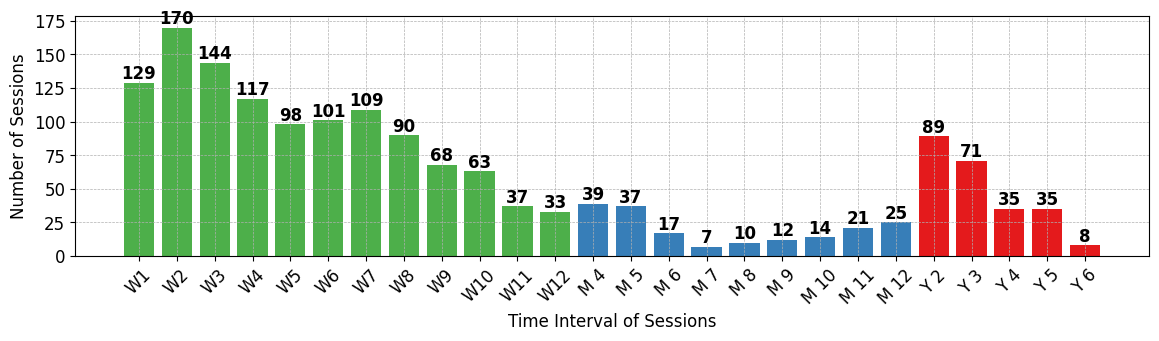

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated data for demonstration (use your actual data for 'y_data', 'h_data', 's_data')
# y_data = np.random.randint(1, 10, 100)  # subject_id
# h_data = np.random.randint(1, 5, 100)  # hardware
# s_data = np.random.randint(1, 180, 100)  # session days

# Prepare the DataFrame
df = pd.DataFrame({
    'subject_id': y_data,
    'hardware': h_data,
    'session': s_data
})

# Deduplicate to ensure only unique sessions
df = df.drop_duplicates(subset=['subject_id', 'hardware', 'session'])



# Remove the first session and adjust session numbers
df = df[df['session'] > 1]  # Remove the first session
df['session'] -= 1  # Adjust session numbers

# Group sessions into weeks
df['week'] = (df['session'] // 7) 

# Separate data into weeks and months
df_weeks = df[df['week'] < 12].copy()  # First 12 weeks remain as weekly
df_months = df[(df['session'] >= 91.2501) & (df['session'] < 365.25)].copy()
df_years = df[df['session'] >= 365.25].copy() 

# Weeks beyond 12 are grouped into months

# Convert weeks beyond 12 into months, starting from Month 4
df_months['month'] = ((df_months['session']) // 30.4167)   # Group into months after Week 12
df_years['year'] = ((df_years['session']) // 365.25)  # Group into months after Week 12

# Count sessions for weeks and months
weekly_counts = df_weeks['week'].value_counts().sort_index()
monthly_counts = df_months['month'].value_counts().sort_index()
yearly_counts = df_years['year'].value_counts().sort_index()

# Create monthly labels
monthly_labels = [f'M {i}' for i in range(4, 4 + len(monthly_counts))]
yearly_labels = [f'Y {i}' for i in range(2, 2 + len(yearly_counts))]

# Combine weekly and monthly counts
weekly_labels = [f'W{week+1}' for week in weekly_counts.index]

labels = weekly_labels + monthly_labels + yearly_labels
counts = list(weekly_counts.values) + list(monthly_counts.values) + list(yearly_counts.values)

# Create bar colors: one color for weeks, another for months
colors = ['#4daf4a'] * len(weekly_labels) + ['#377eb8'] * len(monthly_labels) + ['#e41a1c'] * len(yearly_labels)

# Plotting
plt.figure(figsize=(11.69, 3.5))
bars = plt.bar(labels, counts, color=colors)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontweight='bold',fontsize='12')

# Highlight the first month category if it exists
#if 'Month 4' in labels:
    #bars[len(weekly_labels)].set_color('tomato')  # Change color of the first bar in months

plt.xticks(fontsize=12)  # Adjust font size of x-axis labels
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.xlabel('Time Interval of Sessions',fontsize='12')
plt.ylabel('Number of Sessions',fontsize='12')
#plt.title('Number of Sessions Weeks up to Week 12, Months up 12 and, the Years')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('unique_session_intervals.pdf', format='pdf', dpi=300)
plt.show()